# Steps for Initial Setup -
1. Chose Pyspark kernel in Jupyter Notebook.
2. Verify if SparkContext is available
3. Load the dataset in HDFS or check the path of pre-loaded data in HDFS which is /gldata/Churn.csv and /gldata/Churntest.csv 
   If you want to check the data, access it through Hue- HDFS browser.
4. Learn how to work with Spark Dataframe, Pandas Dataframe and Spark ML Pipeline.

# Steps for Project

1. Create and Check Spark Context for Pyspark shell.
2. Load necessary libraries
3. Check the informtion provided about data.
4. Import the data files provided from HDFS (Churn.csv and Churntest.csv).
5. Display the data in Spark Dataframe. ( Note:: In pyspark, dataframe index the rows from 0 instead of 1)
6. Do data pre-processing required.( Hint - We have some variables which should be of categorical datatype but they are of type integer. Convert them)
7. Do exploratory data analysis.
            7.1 - Describe the data using describe function and state your insights.
            7.2 - Create Histogram for Day minutes spent by customers for churn=0 and 1 values.
            7.3 - Create count plots for Number of customers opt voicemail plan with Churn values.
            7.4 - Create count plots for International Plan opt by customer with Churn values.
            7.5 - Plot Areawise churner and non-churner.
            7.6 - Get correlation matrix using corr() function.
8. Get correlation between Predicting Variable and independent variable and state your insights.
    (Now that we want to predict which customer is going to churn, let’s see what columns might be         interesting for our prediction.One way is to find the correlation between "Churn" and each of         the other columns.This will show us which other columns might predict "Churn" the best.)
9. Applying Machine Learning Model
            9.1 - Import necessary libraries
            9.2 - Create vectors of all indepandant variables (Hint - use VectorAssembler)
            9.3 - Apply Decision Tree Classifier using dependent and independent variables.
            9.4 - Create pipeline to build the classifier.
            9.5 - Use startified sampling to get a sample of data.
            9.6 - Split the data into train and test dataset.
            9.7 - Make predictions and validate your model by calculating accuracy score.
            9.8 - Calculate recall and precision score.
            9.9 - Test the model using test data and calculate accuracy, recall and precision.
            9.10- Repeat steps from 9.3 to 9.9 for Random-forest and Gradient-Boost Classifiers.
10. State your insights and conclusions from the above analysis.
            

# About the Data

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account.Length: how long account has been active.

VMail.Message: Number of voice mail messages send by the customer.

Day.Mins: Time spent on day calls.

Eve.Mins: Time spent on evening calls.

Night.Mins: Time spent on night calls.

Intl. Mins: Time spent on international calls.

Day.Calls: Number of day calls by customers.

Eve.Calls: Number of evening calls by customers.

Intl.Calls: Number of international calls.

Night.Calls: Number of night calls by customer.

Day.Charge: Charges of Day Calls.

Night.Charge: Charges of Night Calls.

Eve.Charge: Charges of evening Calls.

Intl.Charge: Charges of international calls.

VMail.Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area.Code: Area Code of customer.

Int.l.Plan: Does customer have international plan or not.

CustServ.Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)

# Get started 

The project can be deivided into 4 blocks. We have added sample solution till step 8 of project. 

You need to proceed for step 8 and 9 to complete this project.

# Loading the Data and Pre-Processing

Follow steps for Project - 1 to 6. 

In [3]:
sc

''

#### Loading Libraries

In [2]:
##We have to load libraries before we start our analysis. 

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext

OptionError: 'You can only set the value of existing options'

In [ ]:
sc = SparkContext()
spark = SQLContext(sc)

### Import the Data

We have two data files in which training file contains 3333 observations with 21 variables and testing file contains  667 observations. 

In [2]:

ch = spark.read.csv("C:/churn.csv",header=True,inferSchema=True)

### Display the dataframe
### Note:: In pyspark, dataframe index the rows from 0 instead of 1.   

 

In [3]:
ch

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,...,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,...,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,...,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,...,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


# Data Preprocessing

We have some variables which should be of categorical datatype but they are of type integer. First we have
to convert them into as categorical variable.   

In [4]:
ch['Churn']= ch['Churn'].astype('category')
ch['Intl Plan']= ch['Intl Plan'].astype('category')
ch['VMail Plan']= ch['VMail Plan'].astype('category')

# Exploratory Data Analysis

Follow steps 7 and 8.

#### Summary of Dataframe

In pyspark we use 'describe()' to display the summary of variables in dataframe. Also the describe variables doesn't
show the summary of categorical variables in dataframe. We have to explore them explicitly.

In [5]:
ch.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


From the obtained table we find that, summary of dataframe  includes-

**count**- displaying the number of observations in each variable.

**mean**- the mean value around which each observation lies.

**std**- standard deviation; Its a measure of how much close to the mean value the actual data points are.

**min and max**- displays the maximum and minimum value of a variable in dataframe. e.g. in variable account length the
                 service used by people for minimum 1 day and maximum for 243 days. 

**25%**- it shows the first quartile of variable e.g. if we look at the Account Length then it means 25% of the people used
         service for 74 days, similarly for other variables.

**50%**- it shows second quartile of variable e.g. in the vaiable Account Length then it means 50% of the people used service            for 101 days. 

**75%**- shows the third quartile and 75% of people used service for 127 days. 

#### Histogram for Day minutes spent by customers

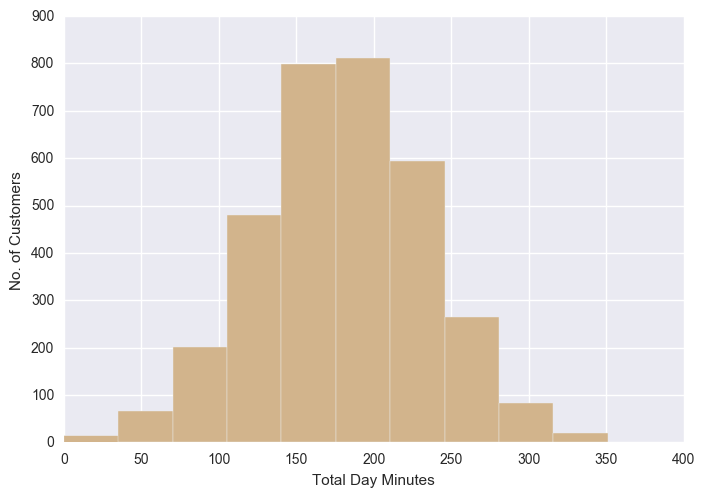

In [6]:
plt.hist(ch['Day Mins'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

The histogram shows that total day minutes spent by customers on day minutes during their service period.

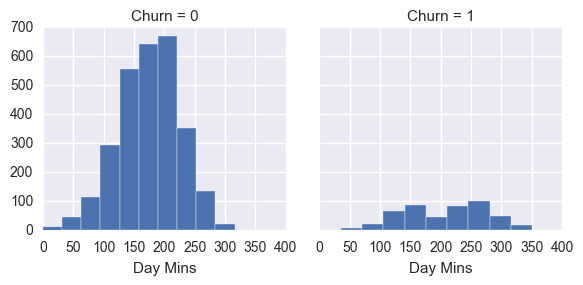

In [8]:
import seaborn as sns
g = sns.FacetGrid(ch, col="Churn")
g.map(plt.hist, "Day Mins")


In the above plot **churn=0** shows **non-churner** and **churn=1** shows **churner**. 

#### Number of customers opt voice mail plan

In [8]:
ch['VMail Plan'].value_counts()

0    2411
1     922
Name: VMail Plan, dtype: int64

We find that 2411 customers who didn't opt the voice mail plan and 922 customers who opted the voice mail plan.   

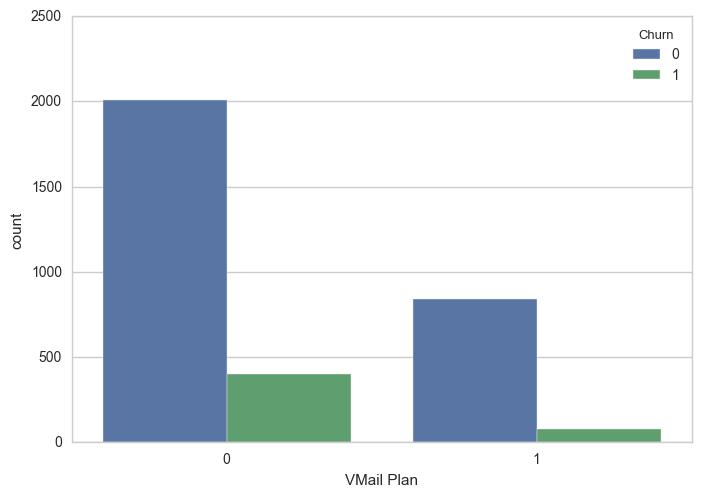

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="VMail Plan", hue= "Churn", data=ch)

#### International Plan opt by customer 

In [10]:
ch['Intl Plan'].value_counts()

0    3010
1     323
Name: Intl Plan, dtype: int64

We find that 3010 customer didn't opt international plan and 323 customers opt the international plan.

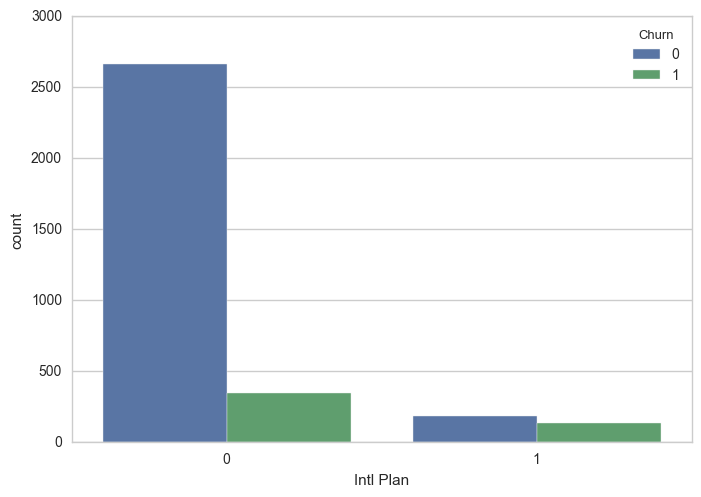

In [11]:
sns.countplot(x="Intl Plan", hue= "Churn", data=ch)

#### Areawise churner and non-churner

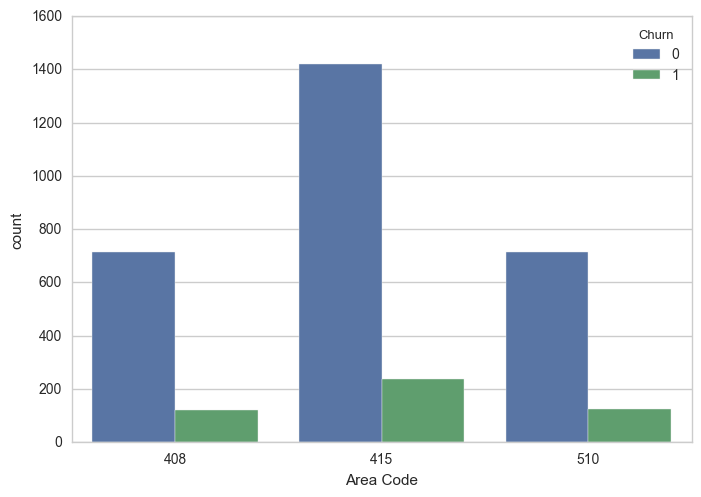

In [12]:
ch['Area Code']= ch['Area Code'].astype('category')
sns.countplot(x="Area Code", hue= "Churn", data=ch)

#### Correlation Matrix

In [9]:
ch.corr('pearson')

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


### Correlation between Predicting Variable and independent variable.

Now that we want to predict which customer is going to churn, let’s see what columns might be interesting for our prediction.
One way is to find the correlation between "Churn" and each of the other columns.
This will show us which other columns might predict "Churn" the best.

In [99]:
ch.corr()["Churn"]

Account Length    0.016541
VMail Message    -0.089728
Day Mins          0.205151
Eve Mins          0.092796
Night Mins        0.035493
Intl Mins         0.068239
CustServ Calls    0.208750
Churn             1.000000
Intl Plan         0.259852
VMail Plan       -0.102148
Day Calls         0.018459
Day Charge        0.205151
Eve Calls         0.009233
Eve Charge        0.092786
Night Calls       0.006141
Night Charge      0.035496
Intl Calls       -0.052844
Intl Charge       0.068259
Area Code         0.006174
Name: Churn, dtype: float64

From the obtained table, we find that **Day minutes**, **Customer Serv Calls**, **Intl Plan** has weak positive correlation with predicting variable **Churn**, while **VMail Message**, **VMail Plan** and **Intl Calls** has weak negative correlation. While remaining variables has either weak positive or negative correlation. 

#### Strong Correlation lies in the range of ±0.5 to ±1

#### Weak Correlation lies in the range of ±0.1 to ±0.1

# Building Machine Learning Model

Follow project step - 9

# Insights and Conclusions

Follow step no 10 of Project.